Objective

In this assignment, you are going to apply what you learned about machine learning to a dataset of your choice on Kaggle Links to an external site.. Kaggle is an online platform for data science. Predict the outcomes in a data set using either Random Forest or k-NN.

This assignment will be continued next week and handed in for feedback then.

The documentation is even more important than the code. Explain what you are doing and why. Only comments on the code should be in coding formatting. All other text (introduction, interpretation, etc.) should be in text (Markdown) cells.

Data set

You can choose from the following data sets:

FIFA 18 Links to an external site.: predict the first item from the variable Preferred Positions (remember the method .split() for strings?)

Tip

Cut down the data set down to size. Though not strictly necessary, this is strongly recommended to make it easier. Select 7 variables with strong predictive value, based on your knowledge of the topic (domain knowledge) and/or correlation. Remember to subset the data with df[[‘column 1’, ‘column2’, ‘column3’]]. Don't spend too much time on this step. It's supposed to make the assignment easier, not harder.

Structure of your Notebook

Introduction: describe which dataset and variables you selected and why
Data cleaning: describe any data cleaning steps
Exploratory data analysis: present relevant grahs and tables with respect to your problem

Predictive model (next week)
Evaluation (next week)
Conclusion (next week)

# Introduction: 
### describe which dataset and variables you selected and why

In [107]:
import pandas as pd
from sklearn.cluster import KMeans #The k-means algorithm
import os
import seaborn as sns

In [108]:
df = pd.read_csv(os.path.join(
     'CompleteDataset.csv'), encoding='latin-1', index_col=0)
df.dropna(inplace=True)
df.head()

C:\Users\Bernd\AppData\Local\Temp\ipykernel_52252\419110960.py:1: DtypeWarning: Columns (23,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(


,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,â¬95.5M,...,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,â¬105M,...,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,â¬123M,...,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,L. SuÃ¡rez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,â¬97M,...,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
5,R. Lewandowski,28,https://cdn.sofifa.org/48/18/players/188545.png,Poland,https://cdn.sofifa.org/flags/37.png,91,91,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,â¬92M,...,58.0,57.0,78.0,62.0,87.0,82.0,88.0,84.0,61.0,88.0


In [109]:
df_sub = df[['Name', 'Age', 'GK diving', 'Finishing', 'Standing tackle', 'Shot power', 'Short passing', 'Preferred Positions']]
df_sub.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 15746 entries, 0 to 17980
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Name                 15746 non-null  object
 1   Age                  15746 non-null  int64 
 2   GK diving            15746 non-null  object
 3   Finishing            15746 non-null  object
 4   Standing tackle      15746 non-null  object
 5   Shot power           15746 non-null  object
 6   Short passing        15746 non-null  object
 7   Preferred Positions  15746 non-null  object
dtypes: int64(1), object(7)
memory usage: 1.1+ MB


# Data cleaning: 
### describe any data cleaning steps

In [110]:
import numpy as np

# Create a new Series with a boolean value for each row indicating whether the number has more than two digits
more_than_two_digits = df_sub[['GK diving', 'Finishing', 'Standing tackle', 'Shot power', 'Short passing', 'Preferred Positions']].apply(lambda x: (len(str(x['GK diving'])) > 2) | (len(str(x['Finishing'])) > 2) | (len(str(x['Standing tackle'])) > 2) | (len(str(x['Shot power'])) > 2) | (len(str(x['Short passing'])) > 2), axis=1)

# Use the Series to filter the DataFrame
df_filtered = df_sub[~more_than_two_digits]

df_filtered

,Name,Age,GK diving,Finishing,Standing tackle,Shot power,Short passing,Preferred Positions
0,Cristiano Ronaldo,32,7,94,31,94,83,ST LW
1,L. Messi,30,6,95,28,85,88,RW
2,Neymar,25,9,89,24,80,81,LW
3,L. SuÃ¡rez,30,27,94,45,87,83,ST
5,R. Lewandowski,28,15,91,42,88,83,ST
...,...,...,...,...,...,...,...,...
17974,J. Keeble,18,5,15,52,30,30,CB
17975,T. KÃ¤Ãemodel,28,10,40,36,52,54,CM
17978,J. Young,17,11,47,17,42,42,ST
17979,J. Lundstram,18,10,32,48,43,49,CM


In [111]:
df_filtered = df_filtered.astype({'Name' : str, 'Age' : int, 'GK diving' : int, 'Finishing' : int, 'Standing tackle' : int, 'Shot power' : int, 'Short passing' : int, 'Preferred Positions' : str})

df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15437 entries, 0 to 17980
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Name                 15437 non-null  object
 1   Age                  15437 non-null  int32 
 2   GK diving            15437 non-null  int32 
 3   Finishing            15437 non-null  int32 
 4   Standing tackle      15437 non-null  int32 
 5   Shot power           15437 non-null  int32 
 6   Short passing        15437 non-null  int32 
 7   Preferred Positions  15437 non-null  object
dtypes: int32(6), object(2)
memory usage: 723.6+ KB


# Exploratory data analysis: 
### present relevant grahs and tables with respect to your problem

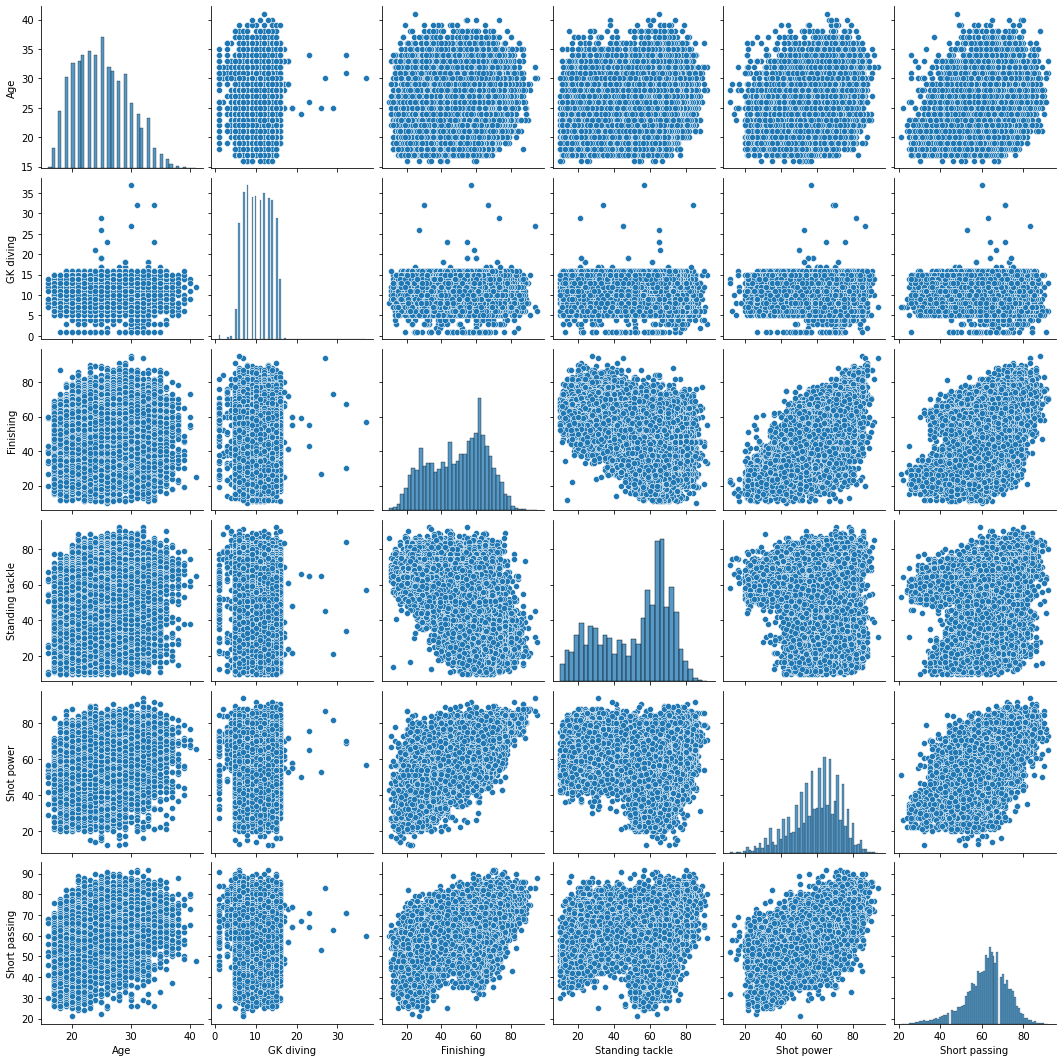

In [112]:
import matplotlib.pyplot as plt
sns.pairplot(df_filtered)
plt.show()

In [113]:
corr = df_filtered.corr() 
corr

,Age,GK diving,Finishing,Standing tackle,Shot power,Short passing
Age,1.000000,0.052790,0.144901,0.215799,0.299623,0.310082
GK diving,0.052790,1.000000,0.020367,0.021878,0.027383,0.028400
Finishing,0.144901,0.020367,1.000000,-0.566111,0.678104,0.402477
Standing tackle,0.215799,0.021878,-0.566111,1.000000,-0.183174,0.204413
Shot power,0.299623,0.027383,0.678104,-0.183174,1.000000,0.552478
Short passing,0.310082,0.028400,0.402477,0.204413,0.552478,1.000000


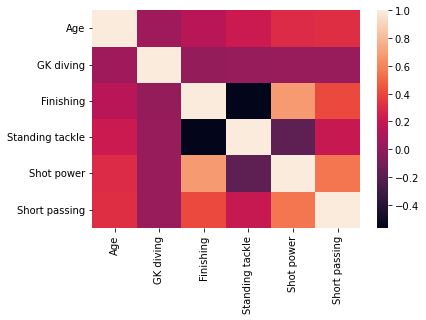

In [114]:
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns) #the last two arguments set the column names
plt.show()

#### i dont know whether those diagrams are useful or not,m they only show the dependencies of the different x variables, which is not that meaningful
#### a diagram which shows the average of a stat per position might be better

# Predictive model
### Choose one of the following: k-nearest neighbor or random forest
### Explain briefly in your own words how the algorithm works
### Split the data set into a training and test set
### Train the model

In [115]:
from sklearn.model_selection import train_test_split

X = df_filtered[['Age', 'GK diving', 'Finishing', 'Standing tackle', 'Shot power', 'Short passing']] #create the X matrix

y = df_filtered['Preferred Positions'] #create the y-variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) #split the data, store it into different variables

X_train.head() #show the head of the training set

,Age,GK diving,Finishing,Standing tackle,Shot power,Short passing
12671,21,14,48,65,35,66
607,26,6,58,78,75,76
12981,29,9,53,31,55,53
5772,27,9,63,70,64,70
11495,21,13,19,68,44,65


In [116]:
from sklearn.neighbors import KNeighborsClassifier #the object class we need

knn = KNeighborsClassifier(n_neighbors=5) #create a KNN-classifier with 3 neighbors
knn = knn.fit(X_train, y_train) #this fits the k-nearest neigbor model with the train data

### Key Points of the k-NN Algorithm
- k-NN is a type of supervised learning algorithm used for classification and regression.
- It works by identifying the k number of data points in the training set that are closest to a given data point, and using those points to predict the label or value for the given data point.
- The distance between data points is typically measured using a distance metric such as Euclidean distance.
- The value of k is a hyperparameter that is chosen by the practitioner and can affect the performance of the model. A larger value of k can smooth out noise in the data, but a smaller value can pick up finer details.
- k-NN is a simple and easy-to-implement algorithm, but it can be computationally expensive and may not scale well to large datasets.

In [117]:
knn.n_samples_fit_

10805

# Evaluation
### Calculate the accuracy, precision and recall. Describe and interpret the results in a Markdown cell.

In [118]:
knn.score(X_test, y_test) #calculate the fit on the *test* data

0.26748704663212436

### The accuracy is 26,75% but this only counts for results to be 100% equal, e.g. pref position rm and st but prediction is only rm is counted as wrong
I will show the accuracy if my example would count later

In [119]:
y_test_pred = knn.predict(X_test) #the predicted values
y_test_pred
y_test

14957           RB 
9725        CDM CB 
11091           RM 
4451            RB 
13916        RB CB 
            ...    
12431           LB 
8798     LM RM CAM 
2348     RB RM CAM 
3364         LB CB 
509          CM LB 
Name: Preferred Positions, Length: 4632, dtype: object

Here i am creating columns that indicate where the pref and predic position are equal and whether it fits partly like rm, st and rm would be True for 'fit' but False for 'equal'

In [163]:
df_comp = pd.DataFrame(y_test)
df_comp['Predicted Position'] = y_test_pred
df_comp['fit'] = df_comp.apply(lambda x: any(word in x['Predicted Position'] for word in x['Preferred Positions'].split()), axis=1)
df_comp = df_comp.assign(equal=df_comp['Predicted Position'].eq(df_comp['Preferred Positions']))
df_comp

,Preferred Positions,Predicted Position,fit,equal
14957,RB,RB CB,True,False
9725,CDM CB,CB,True,False
11091,RM,LM,False,False
4451,RB,RB,True,True
13916,RB CB,CB,True,False
...,...,...,...,...
12431,LB,CB,False,False
8798,LM RM CAM,RM CF CAM,True,False
2348,RB RM CAM,CAM,True,False
3364,LB CB,CB,True,False


I am cleaning the positions as there a for example spaces after a positons

In [155]:
import re
import string
import nltk 
from nltk.corpus import stopwords
lemmatizer = nltk.stem.WordNetLemmatizer()
def clean_text(x):
    stop_words = stopwords.words('english')
    clean = re.compile('<.*?>')
    x = re.sub(clean, ' ', x)
    x = x.translate(str.maketrans(' ', ' ', string.punctuation))
    x = x.lower()
    x = x.strip()
    x = nltk.word_tokenize(x)
    x = [token for token in x if not token in stop_words]
    x = ' '.join([w for w in x])
    return x

In [164]:
df_comp['Preferred Positions'] = df_comp['Preferred Positions'].apply(clean_text)
df_comp['Predicted Position'] = df_comp['Predicted Position'].apply(clean_text)
df_comp


,Preferred Positions,Predicted Position,fit,equal
14957,rb,rb cb,True,False
9725,cdm cb,cb,True,False
11091,rm,lm,False,False
4451,rb,rb,True,True
13916,rb cb,cb,True,False
...,...,...,...,...
12431,lb,cb,False,False
8798,lm rm cam,rm cf cam,True,False
2348,rb rm cam,cam,True,False
3364,lb cb,cb,True,False


Remember precision and recall can only be calculated for an *outcome*, not for an entire variable (unlike accuracy). I'll calculate precision and recall for the position 'rb' and leave the others up for the reader to try.

In [165]:
sub_rb = df_comp.loc[(df_comp['Preferred Positions'].astype(str) == 'rb') | (df_comp['Predicted Position'].astype(str) == 'rb')]

sub_rb

,Preferred Positions,Predicted Position,fit,equal
14957,rb,rb cb,True,False
4451,rb,rb,True,True
3814,cb,rb,False,False
13666,cb,rb,False,False
12255,lb rb,rb,True,False
...,...,...,...,...
9788,cb,rb,False,False
12869,rb,cb,False,False
10106,lb,rb,False,False
15748,rb,cb,False,False


In [170]:
amount_rb_rb = sub_rb[(sub_rb['Preferred Positions'] == 'rb') & (sub_rb['equal'] == True)].shape[0]
amount_x_rb = sub_rb[(sub_rb['Predicted Position'] == 'rb') & (sub_rb['equal'] == False)].shape[0]
amount_rb_x = sub_rb[(sub_rb['Preferred Positions'] == 'rb') & (sub_rb['equal'] == False)].shape[0]
amount = sub_rb.shape[0]
print(amount_rb_rb)
print(amount_rb_x)
print(amount_x_rb)
print(amount)


19
161
106
286


Precision = True Positives / (True Positives + False Positives)

In [171]:
precision_rb = amount_rb_rb / (amount_rb_rb + amount_x_rb)
precision_rb

0.152

The Precision for the position RB is around 15,2%

Recall = True Positives / (True Positives + False Negatives)

In [172]:
recall_rb = amount_rb_rb / (amount_rb_rb + amount_rb_x)
recall_rb

0.10555555555555556

The Recall for the Position RB is around 10,56%

At the end i wantedd to calculate the accuracy if the result is counted as right also atleast one position is predicted right

In [121]:
count_True = df_comp['fit'].value_counts()[True]
count_True 

total = df_comp.shape[0]

calc_right = count_True / total

calc_right

0.6478842832469776

64,8% Accuracy wouldnt be too bad!!

In [173]:
amount_rb_rb_fit = sub_rb[(sub_rb['Preferred Positions'] == 'rb') & (sub_rb['fit'] == True)].shape[0]
amount_x_rb_fit = sub_rb[(sub_rb['Predicted Position'] == 'rb') & (sub_rb['fit'] == False)].shape[0]
amount_rb_x_fit = sub_rb[(sub_rb['Preferred Positions'] == 'rb') & (sub_rb['fit'] == False)].shape[0]

In [174]:
precision_rb_fit = amount_rb_rb_fit / (amount_rb_rb_fit + amount_x_rb_fit)
precision_rb_fit

0.24242424242424243

In [175]:
recall_rb_fit = amount_rb_rb_fit / (amount_rb_rb_fit + amount_rb_x_fit)
recall_rb_fit

0.13333333333333333

Using the fit column the precision would be 24,24% and the recall would be 13,33%

# Conclusion

I think this dataset isnt the best at all to practise. This is due to the fact that the stats of an player dont indicate the position. There are different reasons for that.
- This Dataset includes good and bad players. So e.g. a good striker has a 90 in shooting, a bad striker has a 50 in shooting. But a good defender also could have a 50 in shooting. 
#### Also it is quite confusing whether predicting one position of multiple different positions counts as right or not.